# Data Cleaning dfk

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dfk_path = "../data/01_raw/DataAnalyst.csv"

dfk = pd.read_csv(dfk_path, index_col="Unnamed: 0")





In [231]:
dfk.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [232]:
## Sélection des colonnes

In [233]:
dfk = dfk[
    ["Job Title",
     "Salary Estimate",
     "Location"]
]
dfk["State"] = dfk["Location"].str[-2:]
dfk["State"].head

<bound method NDFrame.head of 0       NY
1       NY
2       NY
3       NY
4       NY
        ..
2248    CO
2249    CO
2250    CO
2251    CO
2252    CO
Name: State, Length: 2253, dtype: object>

## Arrangement des salaires moyens

In [234]:
def mean_salary(s):
    newstr = ''.join((ch if ch in '0123456789' else ' ') for ch in s)
    l = [float(i) for i in newstr.split()]
    m = (sum(l)/len(l)) * 1000
    return m
dfk["Salary Estimate"] = dfk["Salary Estimate"].map(mean_salary) 
dfk.rename(columns={'Salary Estimate': 'SalaryUSD'}, inplace=True)
dfk.head()


,Job Title,SalaryUSD,Location,State
0,"Data Analyst, Center on Immigration and Justic...",51500.0,"New York, NY",NY
1,Quality Data Analyst,51500.0,"New York, NY",NY
2,"Senior Data Analyst, Insights & Analytics Team...",51500.0,"New York, NY",NY
3,Data Analyst,51500.0,"New York, NY",NY
4,Reporting Data Analyst,51500.0,"New York, NY",NY


In [235]:
import re

dfk["Job Title"] = dfk["Job Title"].apply(
    lambda x: "Senior Data Analyst" if re.match(r"(senior|sr).*(data).*(analyst).*", x, re.IGNORECASE) else x
)
dfk["Job Title"] = dfk["Job Title"].apply(
    lambda x: "Junior Data Analyst" if re.match(r"(junior|jr).*(data).*(analyst).*", x, re.IGNORECASE) else x
)

print(dfk["Job Title"].value_counts().to_string())

Data Analyst                                                                                                              405
Senior Data Analyst                                                                                                       330
Junior Data Analyst                                                                                                        42
Business Data Analyst                                                                                                      28
Data Analyst II                                                                                                            17
Data Quality Analyst                                                                                                       17
Data Analyst Junior                                                                                                        17
Data Governance Analyst                                                                                               

## Retrait valeurs extrêmes


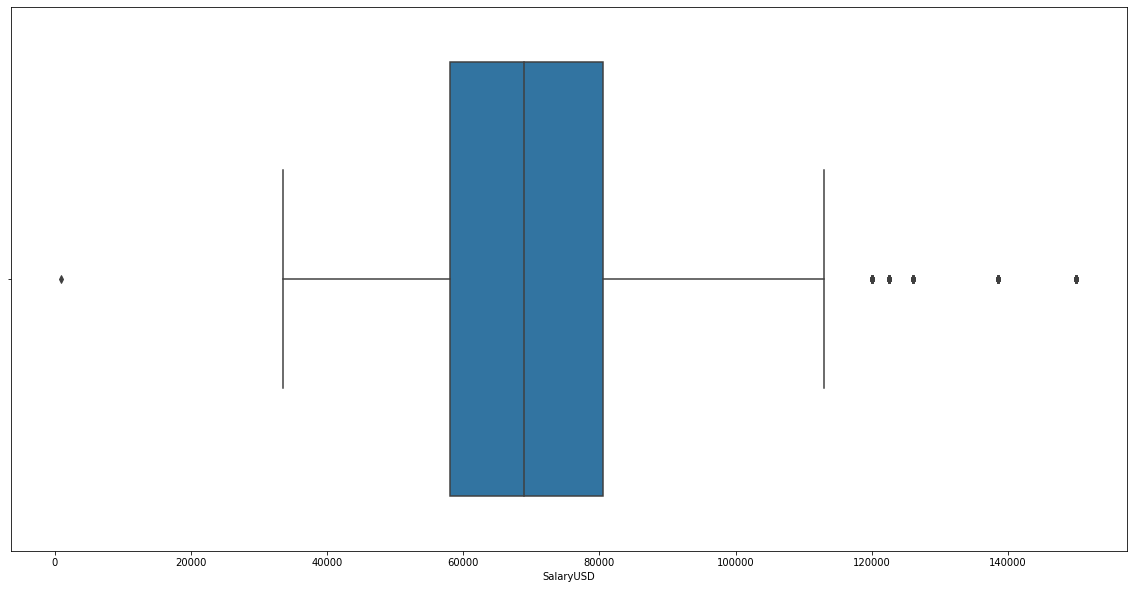

In [236]:
plt.figure(figsize = (20,10))
sns.boxplot(x = dfk["SalaryUSD"])

In [237]:
dfk = dfk.drop(dfk[dfk["SalaryUSD"] < 10000].index)

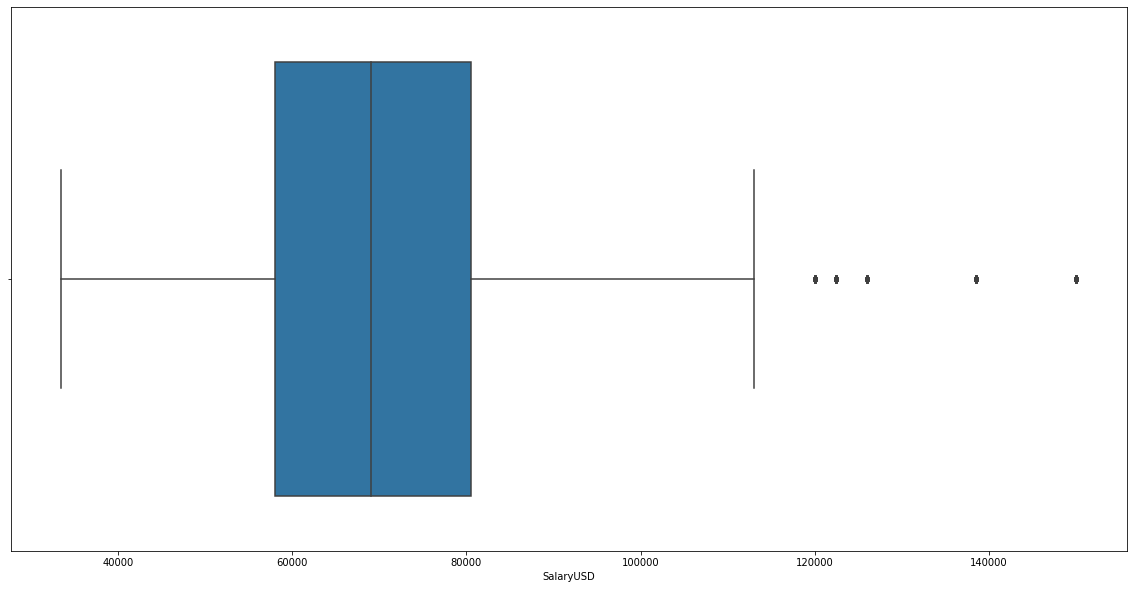

In [238]:
plt.figure(figsize = (20,10))
sns.boxplot(x = dfk["SalaryUSD"])

## Export du .csv

In [239]:
dfk.to_csv("../data/02_intermediate/dfk.csv")